In [1]:
import sklearn
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import pickle
from wordcloud import WordCloud, STOPWORDS 

import warnings
warnings.filterwarnings('ignore')

# Reading the data from the database

In [2]:
conn = sqlite3.connect('../db.sqlite3')
df_raw = pd.read_sql_query('''
SELECT "bouwjaar", "kilometer_stand", "vermogen", "prijs", "is_handgeschakeld", "is_benzine", "titel" 
FROM scraper_auto
WHERE prijs < 20000 AND prijs > 900 AND kilometer_stand < 300000 
''', conn)
df = df_raw.dropna()
df.head(10)

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,titel
0,2008,169504,78,2950,0.0,1,Fiat Grande Punto 1.416V Emotion 5dr Automaat ...
1,2007,219718,65,1950,1.0,1,"Fiat Grande Punto 1.2 Edizione Cool AIRCO,CRUI..."
2,2006,199908,95,1895,1.0,1,Fiat Grande Punto 1.416V Emotion AIRCO/APK
3,2006,139057,65,2950,1.0,1,"Fiat Grande Punto 1.2 Sportsound met Nap, Airco"
4,2007,222844,95,1950,1.0,1,Fiat Grande Punto 1.416V Emotion APK/NAP/CLIMA
5,2008,187215,65,2450,1.0,1,Fiat Grande Punto 1.2 Active AIRCO APK 2019 (b...
6,2010,194607,86,2895,1.0,0,Fiat Grande Punto 1.3 MJet Actual
7,2007,238443,75,1749,1.0,0,Fiat Grande Punto 1.3 JTD Active
8,2006,208650,77,1850,1.0,1,Fiat Grande Punto 1.4 Edizione Prima
9,2006,176540,78,2440,1.0,1,Fiat Grande Punto 1.4 Edizione Prima 2006 NAP!...


# Plotting histograms and countplots for all relevant columns
Observations:
- After 200.000km the listings drop, should probabliy buy around 150.000km
- After 3000 euros the listings drop
- Mostly petrol cars

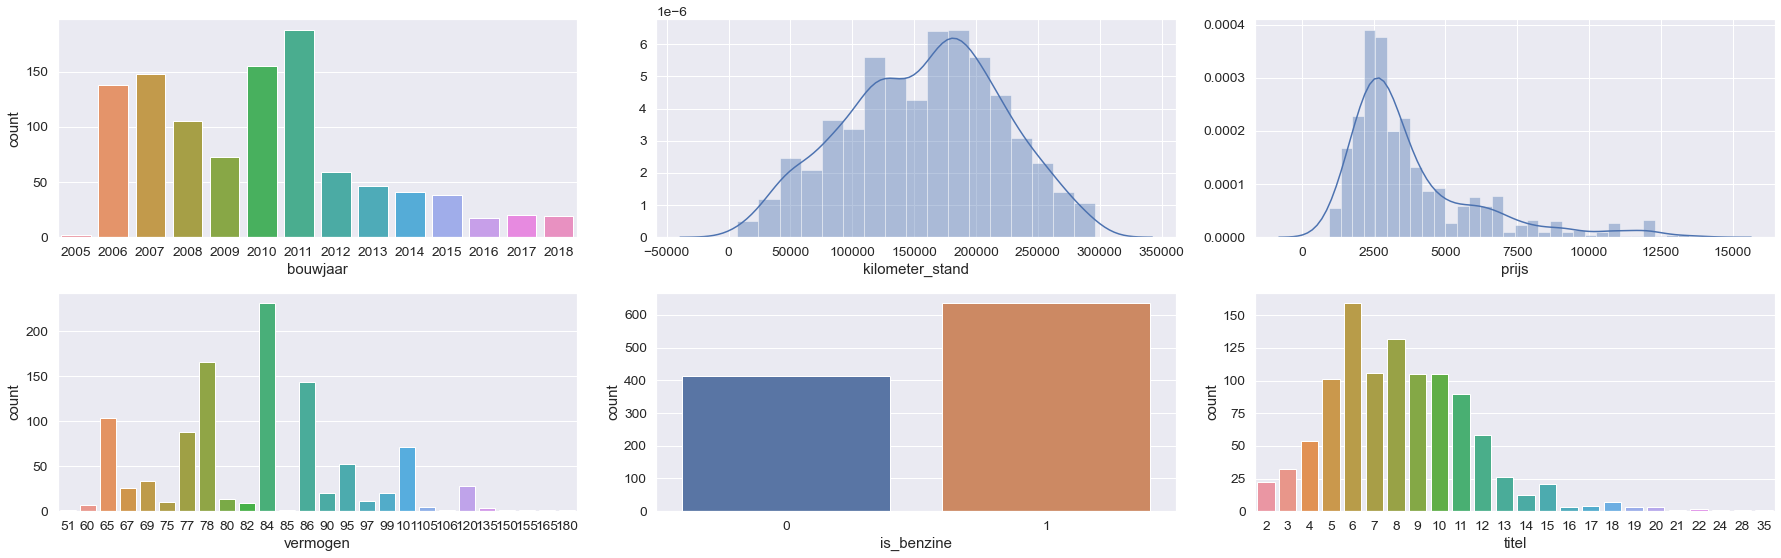

In [156]:
fig, axs = plt.subplots(2, 3, figsize=(25,8))

sns.countplot(df['bouwjaar'], ax=axs[0][0]);
sns.distplot(df['kilometer_stand'], ax=axs[0][1])
sns.distplot(df['prijs'], ax=axs[0][2]);
sns.countplot(df['vermogen'], ax=axs[1][0]);
sns.countplot(df['is_benzine'], ax=axs[1][1]);
sns.countplot(df['titel'].apply(lambda x: len(str(x).split())), ax=axs[1][2]);

plt.tight_layout()

# Scatter plots

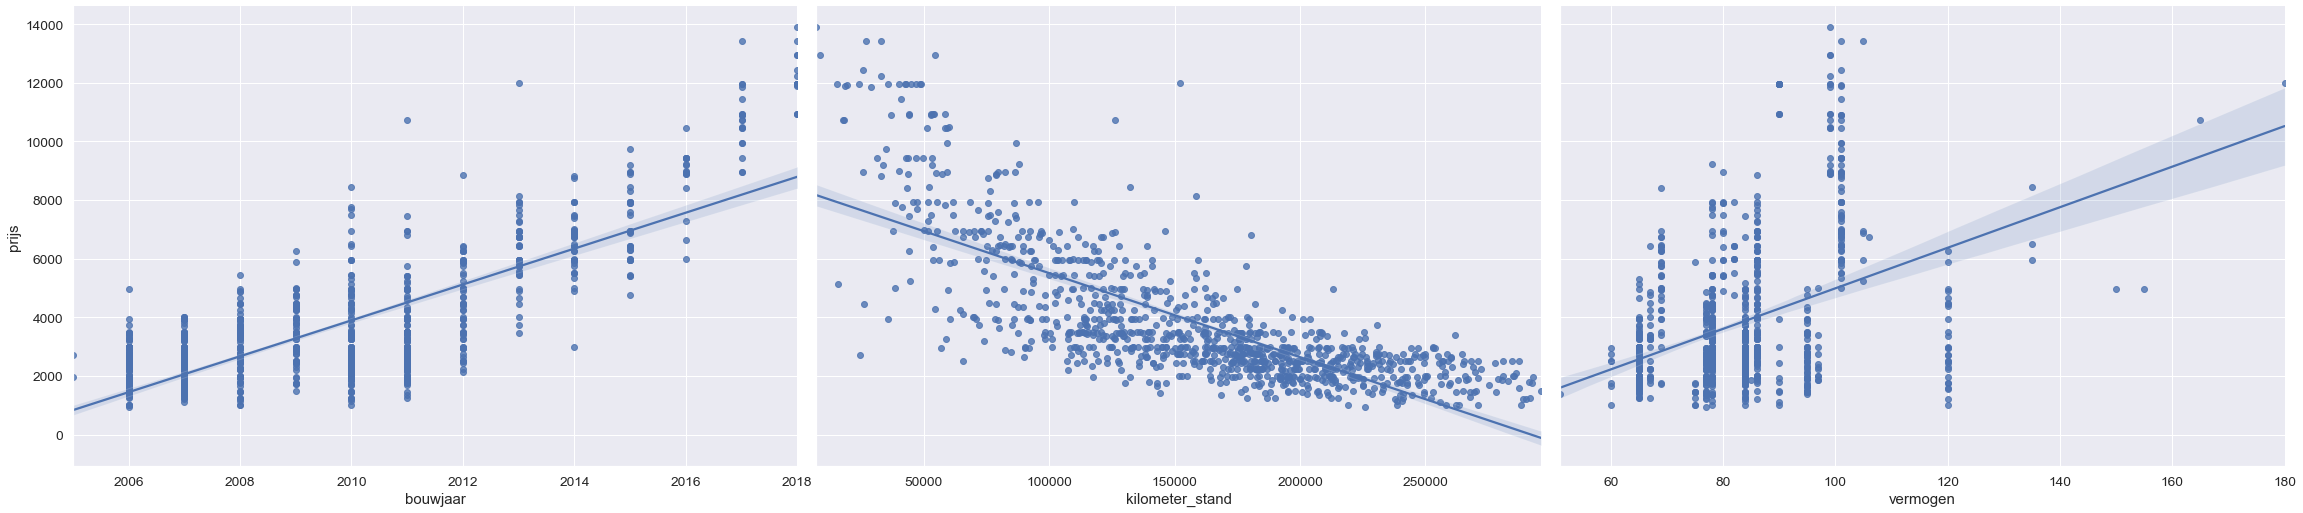

In [157]:
sns.pairplot(df, y_vars='prijs', x_vars=['bouwjaar', 'kilometer_stand', 'vermogen'], kind='reg', height=7, aspect=1.5)

# Correlations

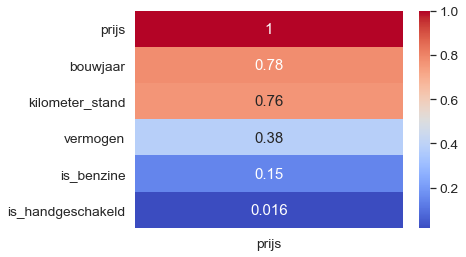

In [158]:
df_numeric = df._get_numeric_data()
sns.heatmap(df_numeric.corr().abs()[['prijs']].sort_values(by=['prijs'],ascending=False), 
            annot=True, 
            cmap='coolwarm')

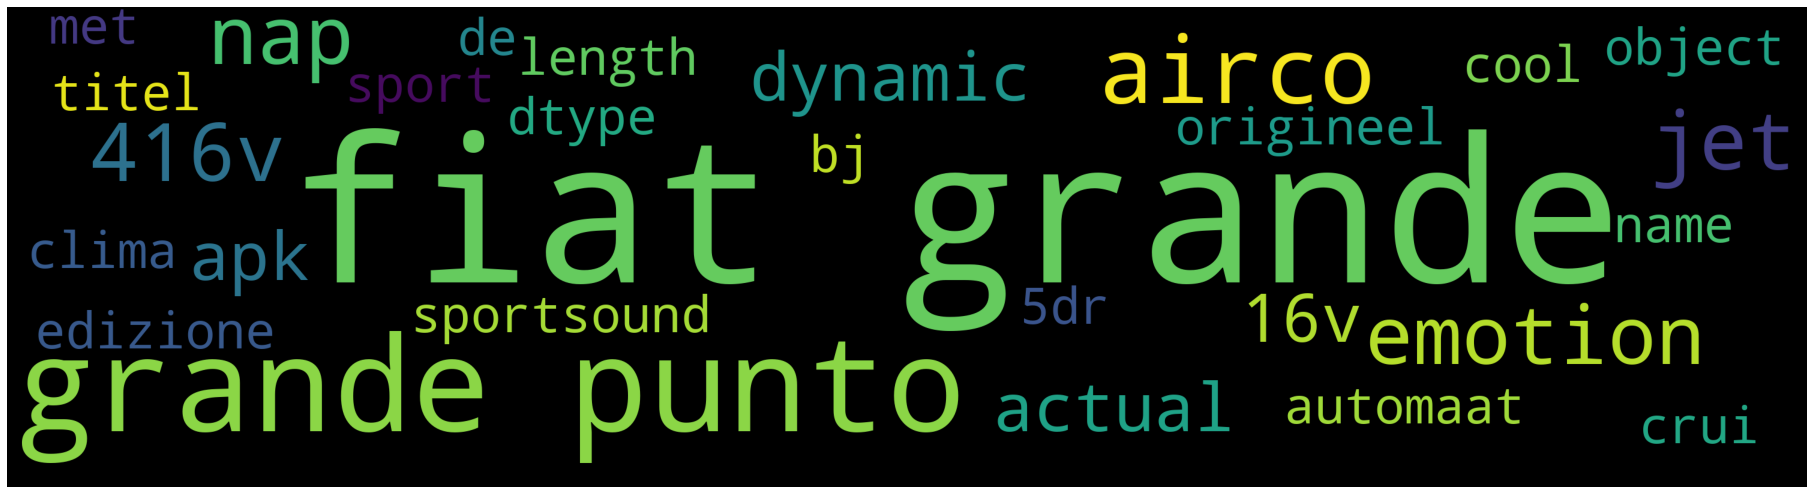

In [159]:
text = str(df['titel']).lower()

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(
    width = 3000, 
    height = 800, 
    background_color ='black'
).generate(text) 
                       
plt.figure(figsize = (25, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 